In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df_train = pd.read_csv(r"E:\python_ws\data\Laptopprice\laptops_train.csv")

In [119]:
df_test = pd.read_csv(r"E:\python_ws\data\Laptopprice\laptops_test.csv")

In [120]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0


In [121]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [122]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              325 non-null    object 
 1   Model Name                325 non-null    object 
 2   Category                  325 non-null    object 
 3   Screen Size               325 non-null    object 
 4   Screen                    325 non-null    object 
 5   CPU                       325 non-null    object 
 6   RAM                       325 non-null    object 
 7    Storage                  325 non-null    object 
 8   GPU                       325 non-null    object 
 9   Operating System          325 non-null    object 
 10  Operating System Version  291 non-null    object 
 11  Weight                    325 non-null    object 
 12  Price                     325 non-null    float64
dtypes: float64(1), object(12)
memory usage: 33.1+ KB


In [123]:
df_train.describe()

,Price
count,9.770000e+02
mean,1.001899e+07
std,6.306430e+06
min,1.706375e+06
25%,5.326308e+06
50%,8.527428e+06
75%,1.311570e+07
max,5.423231e+07


## Data Cleaning


In [124]:
df_train = df_train.rename(columns = str.lower)
df_test = df_test.rename(columns = str.lower)

In [125]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'screen',
       'cpu', 'ram', ' storage', 'gpu', 'operating system',
       'operating system version', 'weight', 'price'],
      dtype='object')

In [126]:
df_train.loc[df_train.duplicated()]

,manufacturer,model name,category,screen size,screen,cpu,ram,storage,gpu,operating system,operating system version,weight,price


No duplicates

## Dataset cleaning + Feature Engineering

### Screen resolution


In [127]:
df_train.screen.sample(20)

910                            Full HD 1920x1080
439                            Full HD 1920x1080
536                            Full HD 1920x1080
696              Full HD / Touchscreen 1920x1080
702                                     1366x768
406                            Full HD 1920x1080
714                            Full HD 1920x1080
570                                     1600x900
838                                     1366x768
867    IPS Panel Full HD / Touchscreen 1920x1080
473              Full HD / Touchscreen 1920x1080
677                         Touchscreen 1366x768
642                  IPS Panel Full HD 1920x1080
556                  IPS Panel Full HD 1920x1080
294                            Full HD 1920x1080
573                            Full HD 1920x1080
650                  IPS Panel Full HD 1920x1080
523                                     1366x768
317                                     1366x768
432                  IPS Panel Full HD 1920x1080
Name: screen, dtype:

### Feature Engineering on Screen resolution

In [128]:
df_train['resolution'] = df_train['screen'].str.extract(r'(\d+x\d+)')



In [129]:
df_test['resolution'] = df_test['screen'].str.extract(r'(\d+x\d+)')

In [130]:
df_train.resolution

0      2560x1600
1       1440x900
2      1920x1080
3      2880x1800
4      2560x1600
         ...    
972    1920x1080
973    1920x1080
974    1920x1080
975    1920x1080
976     1366x768
Name: resolution, Length: 977, dtype: object

In [131]:
df_train.screen.iloc[470:475].str.extract(r'(\d+x\d+)')

,0
470,3840x2160
471,1920x1080
472,2400x1600
473,1920x1080
474,3840x2160


In [132]:
df_train['screen_type'] = df_train['screen'].replace(r'(\d+x\d+)','',regex=True)

In [133]:
df_test['screen_type'] = df_test['screen'].replace(r'(\d+x\d)','',regex=True)

In [134]:
df_train.head()

,manufacturer,model name,category,screen size,screen,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48,2560x1600,IPS Panel Retina Display
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48,1440x900,
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00,1920x1080,Full HD
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40,2880x1800,IPS Panel Retina Display
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20,2560x1600,IPS Panel Retina Display


In [135]:
df_train.screen_type = df_train.screen_type.replace(r'(Full HD|Quad HD|\+|/|4K Ultra HD)', '', regex=True)
df_test.screen_type = df_test.screen_type.replace(r'(Full HD|Quad HD|\+|/|4K Ultra HD)', '', regex=True)

In [136]:
df_train.screen_type

0      IPS Panel Retina Display 
1                               
2                               
3      IPS Panel Retina Display 
4      IPS Panel Retina Display 
                 ...            
972                             
973                             
974                             
975                  IPS Panel  
976                             
Name: screen_type, Length: 977, dtype: object

In [137]:
df_train['touchscreen'] = df_train['screen_type'].str.extract(r'(Touchscreen)')

In [138]:
df_train.screen_type = df_train.screen_type.str.replace(r'(Touchscreen)','',regex=True)

In [139]:
df_test['touchscreen'] = df_test['screen_type'].str.extract(r'(Touchscreen)')
df_test.touchscreen = df_test.screen_type.str.replace(r'(Touchscreen)','',regex=True)

In [140]:
df_train.touchscreen.value_counts()

touchscreen
Touchscreen    141
Name: count, dtype: int64

In [141]:
df_train.screen_type.value_counts()

screen_type
                             432
                             208
IPS Panel                    206
                              57
IPS Panel                     50
IPS Panel Retina Display      14
IPS Panel                     10
Name: count, dtype: int64

In [142]:
df_train['screen_type'] = df_train['screen_type'].replace(r' ','', regex = True)
df_test['screen_type'] = df_test['screen_type'].replace(r' ','', regex = True)
df_train['screen_type'].value_counts()


screen_type
                         697
IPSPanel                 266
IPSPanelRetinaDisplay     14
Name: count, dtype: int64

In [143]:
df_train.screen_type = df_train['screen_type'].replace(r'^\s*$', np.nan, regex = True)

In [144]:
df_test.screen_type=df_test['screen_type'].replace(r'^\s*$', np.nan, regex = True).replace(r'(\d+)','',regex=True).replace(r'^\s*$',np.nan,regex=True)

In [145]:
df_test.screen_type.value_counts()

screen_type
IPSPanel                 52
IPSPanelTouchscreen      30
Touchscreen              20
IPSPanelRetinaDisplay     3
Name: count, dtype: int64

In [146]:
df_train = df_train.drop('screen',axis=1)
df_test = df_test.drop('screen',axis=1)

In [147]:
df_train.screen_type.value_counts()

screen_type
IPSPanel                 266
IPSPanelRetinaDisplay     14
Name: count, dtype: int64

### Feature Engineering on CPU column

In [148]:
df_train.cpu.head(5)

0          Intel Core i5 2.3GHz
1          Intel Core i5 1.8GHz
2    Intel Core i5 7200U 2.5GHz
3          Intel Core i7 2.7GHz
4          Intel Core i5 3.1GHz
Name: cpu, dtype: object

In [149]:
df_train['frequency'] = df_train['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)')

In [150]:
df_test['frequency'] = df_test.cpu.str.extract(r'(\d+(?:\.\d+)?GHz)')

In [151]:
df_test.head()

,manufacturer,model name,category,screen size,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen,frequency
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0,1366x768,NaN,68,2.7GHz
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0,1920x1080,NaN,080,2.8GHz
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0,1920x1080,IPSPanelTouchscreen,IPS Panel 080,2.7GHz
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0,1920x1080,NaN,080,2.3GHz
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0,1920x1080,NaN,080,3.6GHz


In [152]:
df_train.rename(columns = {'frequency':'cpu_frequency_ghz'}, inplace = True)

In [153]:
df_test.rename(columns = {'frequency':'cpu_frequency_ghz'}, inplace = True)

In [154]:
df_test.cpu_frequency_ghz = df_test.cpu_frequency_ghz.str.replace('GHz','',regex=True)
df_train.cpu_frequency_ghz = df_train.cpu_frequency_ghz.str.replace('GHz','',regex=True)

In [155]:
df_train.cpu_frequency_ghz = df_train.cpu_frequency_ghz.astype(float)

In [156]:
df_test.cpu_frequency_ghz = df_test.cpu_frequency_ghz.astype(float)

In [157]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen,cpu_frequency_ghz
0,Apple,MacBook Pro,Ultrabook,"13.3""",Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48,2560x1600,IPSPanelRetinaDisplay,NaN,2.3
1,Apple,Macbook Air,Ultrabook,"13.3""",Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48,1440x900,NaN,NaN,1.8
2,HP,250 G6,Notebook,"15.6""",Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00,1920x1080,NaN,NaN,2.5
3,Apple,MacBook Pro,Ultrabook,"15.4""",Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40,2880x1800,IPSPanelRetinaDisplay,NaN,2.7
4,Apple,MacBook Pro,Ultrabook,"13.3""",Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20,2560x1600,IPSPanelRetinaDisplay,NaN,3.1


In [158]:
df_train.cpu = df_train.cpu.str.replace(r'(\d+\.\d+GHz)','',regex=True)
df_test.cpu = df_test.cpu.str.replace(r'(\d+\.\d+GHz)','',regex=True)

### RAM

In [159]:
df_train.ram.value_counts()

ram
8GB     483
4GB     271
16GB    149
6GB      24
12GB     21
32GB     16
2GB      10
24GB      3
Name: count, dtype: int64

In [160]:
df_train.ram = df_train.ram.str.replace('GB','',regex=True)
df_test.ram = df_test.ram.str.replace('GB','',regex=True)

df_train.rename(columns = {'ram':'ram_gb'}, inplace = True)
df_test.rename(columns = {'ram':'ram_gb'})

,manufacturer,model name,category,screen size,cpu,ram_gb,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen,cpu_frequency_ghz
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",Intel Core i7 7500U,6,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0,1366x768,NaN,68,2.7
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Intel Core i7 7700HQ,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0,1920x1080,NaN,080,2.8
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",Intel Core i7 7500U,12,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0,1920x1080,IPSPanelTouchscreen,IPS Panel 080,2.7
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Intel Core i5 6200U,4,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0,1920x1080,NaN,080,2.3
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",AMD A12-Series 9720P,6,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0,1920x1080,NaN,080,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,"14.0""",Intel Core i7 6500U,4,128GB SSD,Intel HD Graphics 520,Windows,10,1.8kg,5673096.0,1920x1080,IPSPanelTouchscreen,IPS Panel 080,2.5
321,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,"13.3""",Intel Core i7 6500U,16,512GB SSD,Intel HD Graphics 520,Windows,10,1.3kg,13329108.0,3200x1800,IPSPanelTouchscreen,IPS Panel 800,2.5
322,Lenovo,IdeaPad 100S-14IBR,Notebook,"14.0""",Intel Celeron Dual Core N3050,2,64GB Flash Storage,Intel HD Graphics,Windows,10,1.5kg,2036268.0,1366x768,NaN,68,1.6
323,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,"15.6""",Intel Core i7 6500U,6,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19kg,6793488.0,1366x768,NaN,68,2.5


### Storage Memory

In [161]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram_gb', ' storage', 'gpu', 'operating system',
       'operating system version', 'weight', 'price', 'resolution',
       'screen_type', 'touchscreen', 'cpu_frequency_ghz'],
      dtype='object')

In [162]:
df_train.rename(columns = {' storage':'storage'},inplace=True)
df_test.rename(columns = {' storage':'storage'},inplace=True)

In [163]:
df_train.storage.value_counts()

storage
256GB SSD                        318
1TB HDD                          171
512GB SSD                         91
500GB HDD                         79
128GB SSD +  1TB HDD              71
128GB SSD                         62
256GB SSD +  1TB HDD              52
32GB Flash Storage                29
2TB HDD                           14
512GB SSD +  1TB HDD              13
1TB SSD                           11
256GB SSD +  2TB HDD              10
64GB Flash Storage                 9
16GB Flash Storage                 6
256GB Flash Storage                5
32GB SSD                           5
128GB Flash Storage                4
1GB SSD                            4
256GB SSD +  256GB SSD             2
16GB SSD                           2
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
128GB SSD +  2TB HDD               2
512GB SSD +  512GB SSD             1
512GB SSD +  256GB SSD             1
64GB SSD                           1
64GB Flash Storage +  1TB HDD 

In [164]:
df_train.loc[df_train.storage.str.contains('TB'),'storage'].value_counts()

storage
1TB HDD                          171
128GB SSD +  1TB HDD              71
256GB SSD +  1TB HDD              52
2TB HDD                           14
512GB SSD +  1TB HDD              13
1TB SSD                           11
256GB SSD +  2TB HDD              10
128GB SSD +  2TB HDD               2
512GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
1TB Hybrid                         1
64GB Flash Storage +  1TB HDD      1
1TB HDD +  1TB HDD                 1
Name: count, dtype: int64

In [165]:
df_train['storage_1'] = df_train.storage
df_test['storage_1'] = df_test.storage

In [166]:
df_train.storage_1 = df_train.storage_1.str.replace('1TB','1000GB',regex=True)
df_train.storage_1 = df_train.storage_1.str.replace('2TB','2000GB',regex=True)
df_train.storage_1 = df_train.storage_1.str.replace('GB','',regex=True)

In [167]:
df_test.storage_1 = df_test.storage_1.str.replace('1TB','1000GB',regex=True)
df_test.storage_1 = df_test.storage_1.str.replace('2TB','2000GB',regex=True)
df_test.storage_1 = df_test.storage_1.str.replace('GB','',regex=True)

In [168]:
df_train['storage_2'] = df_train.storage_1.str.replace(r' ','')
df_test['storage_2'] = df_test.storage_1.str.replace(r' ','')

In [169]:
    df_train.storage_2

0               128SSD
1      128FlashStorage
2               256SSD
3               512SSD
4               256SSD
            ...       
972     256SSD+1000HDD
973             256SSD
974     256SSD+1000HDD
975     128SSD+1000HDD
976          508Hybrid
Name: storage_2, Length: 977, dtype: object

In [170]:
import re

In [171]:
re.findall(r'\w+','256SSG+1000HDD')[1]

'1000HDD'

In [172]:
storage_1 = []
storage_2 = []

for i in df_train.storage_2:
    if len(re.findall(r'\+',i)) ==1:
        one = re.findall(r'\w+',i)
        storage_1.append(one[0])
        storage_2.append(one[1])
    else:
        one = re.findall(r'\w+',i)
        storage_1.append(one[0])
        storage_2.append('NaN')

In [173]:
s1 = []
s2 = []

for i in df_test.storage_2:
    if len(re.findall(r'\+',i)) == 1:
        one = re.findall(r'\w+',i)
        s1.append(one[0])
        s2.append(one[1])
    else:
        one = re.findall(r'\w+',i)
        s1.append(one[0])
        s2.append('NaN')

In [174]:
storage_1_gb = []
storage_1_type = []

for i in storage_1:
    storage_1_type.append(re.findall('\D\w+',i)[0])
    storage_1_gb.append(re.findall('\d+',i)[0])

In [175]:
s1_gb = []
s1_type = []

for i in s1:
    s1_type.append(re.findall('\D\w+',i)[0])
    s1_gb.append(re.findall('\d+',i)[0])

In [176]:
storage_2_gb = []
storage_2_type = []

for i in storage_2:
    if i != 'NaN':
        storage_2_type.append(re.findall('\D\w+',i)[0])
        storage_2_gb.append(re.findall('\d+',i)[0])
    else:
        storage_2_type.append('NaN')
        storage_2_gb.append(0)

In [177]:
s2_gb = []
s2_type = []

for i in s2:
    if i != 'NaN':
        s2_type.append(re.findall('\D\w+',i)[0])
        s2_gb.append(re.findall('\d+',i)[0])
    else:
        s2_type.append('NaN')
        s2_gb.append(0)

In [178]:
df_train['storage_1_gb'] = storage_1_gb
df_train['storage_1_type']= storage_1_type
df_train['storage_2_gb'] = storage_2_gb
df_train['storage_2_type'] = storage_2_type

In [179]:
len(s2)

325

In [180]:
df_test['storage_1_gb'] = s1_gb
df_test['storage_1_type'] = s1_type
df_test['storage_2_gb'] = s2_gb
df_test['storage_2_type'] = s2_type

In [181]:
df_train.drop(['storage_1','storage','storage_2'],axis=1,inplace=True)
df_test.drop(['storage_1','storage_2','storage'],axis=1,inplace=True)

In [182]:
df_train['storage_1_gb'] = df_train['storage_1_gb'].astype(float)
df_train['storage_2_gb'] = df_train['storage_2_gb'].astype(float)

df_test['storage_1_gb'] = df_test['storage_1_gb'].astype(float)
df_test['storage_2_gb'] = df_test['storage_2_gb'].astype(float)

In [183]:
df_train = df_train.replace('NaN',np.nan)

In [184]:
df_test = df_test.replace({'NaN':np.nan})

### Weight

In [185]:
df_train.weight.sample(20)

947      2.2kg
444      2.2kg
969      2.4kg
820      2.1kg
490      2.3kg
151     2.62kg
458     1.25kg
794    0.920kg
314      1.1kg
592     1.39kg
965     2.25kg
295      3.2kg
382      2.3kg
129      2.5kg
227        2kg
566     1.93kg
411      1.7kg
141     1.75kg
456     4.42kg
940     2.75kg
Name: weight, dtype: object

In [186]:
re.findall(r'\d+.\d+','0.98kg')

['0.98']

In [187]:
df_train.weight = df_train.weight.replace('kg','',regex=True)

In [188]:
df_train.weight.astype(float)

0      1.37
1      1.34
2      1.86
3      1.83
4      1.37
       ... 
972    4.42
973    1.95
974    2.73
975    2.04
976    1.70
Name: weight, Length: 977, dtype: float64

In [189]:
df_test.weight = df_test.weight.replace('kg','',regex=True)

In [190]:
df_test.weight = df_test.weight.replace('s','',regex=True)

In [191]:
df_test.weight.astype(float)

0      2.04
1      2.99
2      2.19
3      1.20
4      2.20
       ... 
320    1.80
321    1.30
322    1.50
323    2.19
324    2.20
Name: weight, Length: 325, dtype: float64

In [192]:
df_train.rename(columns = {'weight':'weight(kg)'},inplace=True)
df_test.rename(columns = {'weight':'weight(kg)'},inplace=True)

In [193]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram_gb,gpu,operating system,operating system version,weight(kg),price,resolution,screen_type,touchscreen,cpu_frequency_ghz,storage_1_gb,storage_1_type,storage_2_gb,storage_2_type
0,Apple,MacBook Pro,Ultrabook,"13.3""",Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,NaN,1.37,11912523.48,2560x1600,IPSPanelRetinaDisplay,NaN,2.3,128.0,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,"13.3""",Intel Core i5,8,Intel HD Graphics 6000,macOS,NaN,1.34,7993374.48,1440x900,NaN,NaN,1.8,128.0,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,"15.6""",Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,NaN,1.86,5112900.00,1920x1080,NaN,NaN,2.5,256.0,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,"15.4""",Intel Core i7,16,AMD Radeon Pro 455,macOS,NaN,1.83,22563005.40,2880x1800,IPSPanelRetinaDisplay,NaN,2.7,512.0,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,"13.3""",Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,NaN,1.37,16037611.20,2560x1600,IPSPanelRetinaDisplay,NaN,3.1,256.0,SSD,0.0,NaN


### CPU and GPU brand

In [194]:
df_train['cpu_brand'] = df_train['cpu'].str.extract(r'^(\w+)')
df_test['cpu_brand'] = df_test['cpu'].str.extract(r'^(\w+)')


In [195]:
df_test.cpu_brand.value_counts()

cpu_brand
Intel      310
AMD         14
Samsung      1
Name: count, dtype: int64

In [196]:
df_train['gpu_brand'] = df_train['gpu'].str.extract(r'^(\w+)')
df_test['gpu_brand'] = df_test['gpu'].str.extract(r'^(\w+)')

In [197]:
df_test.gpu_brand.value_counts()

gpu_brand
Intel     197
Nvidia     89
AMD        38
ARM         1
Name: count, dtype: int64

In [198]:
df_train['weight(kg)'] = df_train['weight(kg)'].astype(float)
df_test['weight(kg)'] = df_test['weight(kg)'].astype(float)
df_train.ram_gb = df_train.ram_gb.astype(float)

In [199]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              977 non-null    object 
 1   model name                977 non-null    object 
 2   category                  977 non-null    object 
 3   screen size               977 non-null    object 
 4   cpu                       977 non-null    object 
 5   ram_gb                    977 non-null    float64
 6   gpu                       977 non-null    object 
 7   operating system          977 non-null    object 
 8   operating system version  841 non-null    object 
 9   weight(kg)                977 non-null    float64
 10  price                     977 non-null    float64
 11  resolution                977 non-null    object 
 12  screen_type               280 non-null    object 
 13  touchscreen               141 non-null    object 
 14  cpu_freque

In [200]:
df_test.ram = df_test.ram.astype(float)

In [201]:
df_test.rename (columns = {'ram':'ram_gb'},inplace=True)

The Data looks clean and ready to be explored

In [202]:
df_train.to_csv('laptop-clean-train.csv', index = False)
df_test.to_csv('laptop-clean-test.csv', index = False)

## Exploratory Data Analysis EDA

In [203]:
df1 = pd.read_csv('laptop-clean-train.csv')

In [204]:
df1.head()

,manufacturer,model name,category,screen size,cpu,ram_gb,gpu,operating system,operating system version,weight(kg),...,resolution,screen_type,touchscreen,cpu_frequency_ghz,storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,"13.3""",Intel Core i5,8.0,Intel Iris Plus Graphics 640,macOS,NaN,1.37,...,2560x1600,IPSPanelRetinaDisplay,NaN,2.3,128.0,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,"13.3""",Intel Core i5,8.0,Intel HD Graphics 6000,macOS,NaN,1.34,...,1440x900,NaN,NaN,1.8,128.0,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,"15.6""",Intel Core i5 7200U,8.0,Intel HD Graphics 620,No OS,NaN,1.86,...,1920x1080,NaN,NaN,2.5,256.0,SSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,"15.4""",Intel Core i7,16.0,AMD Radeon Pro 455,macOS,NaN,1.83,...,2880x1800,IPSPanelRetinaDisplay,NaN,2.7,512.0,SSD,0.0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,"13.3""",Intel Core i5,8.0,Intel Iris Plus Graphics 650,macOS,NaN,1.37,...,2560x1600,IPSPanelRetinaDisplay,NaN,3.1,256.0,SSD,0.0,NaN,Intel,Intel


In [205]:
df_clean = df1.copy()

### Which brand is the most frequent in the dataframe?

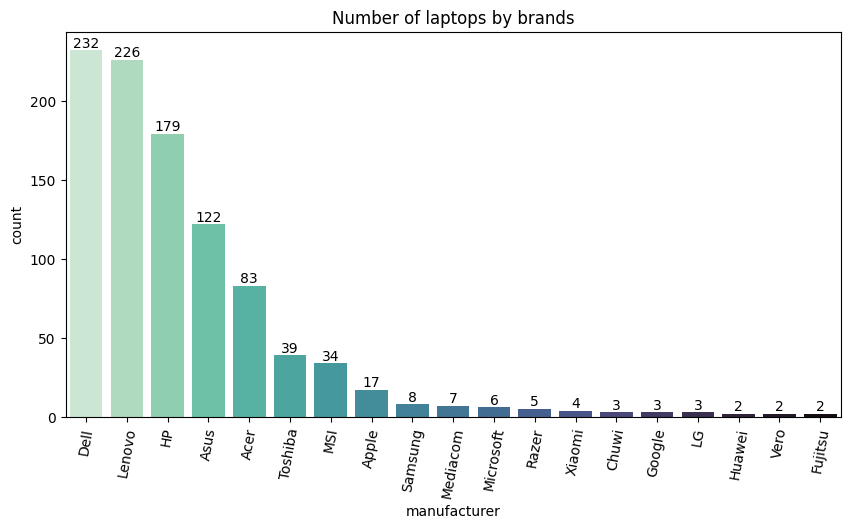

In [206]:
fig, ax  = plt.subplots(figsize = (10,5))
ax = sns.countplot(x = 'manufacturer', data = df_train, palette='mako_r', order = df_train['manufacturer'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by brands')
plt.show()

Dell, Lenovo, and HP are the most popular

### What type of laptop is the most frequent ?

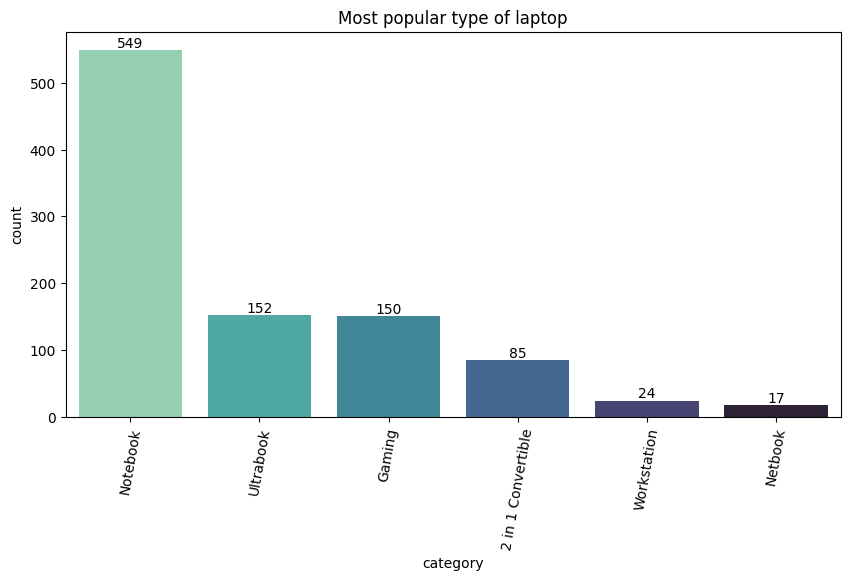

In [207]:
fig, ax  = plt.subplots(figsize = (10,5))
ax = sns.countplot(x = 'category', data = df_train, palette='mako_r', order = df_train['category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Most popular type of laptop')
plt.show()

Most laptops are of Notebook, Ultrabooks, then Gaming type

### Which size is the most popular ?

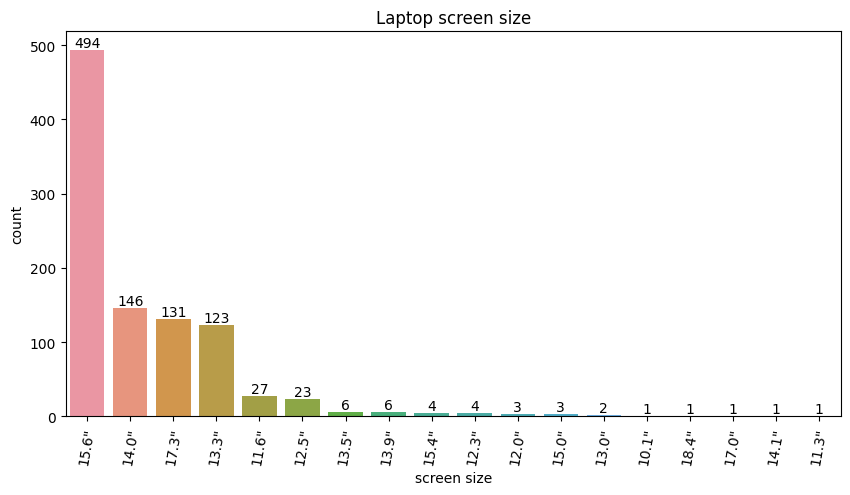

In [208]:
fig, ax  = plt.subplots(figsize = (10,5))
ax = sns.countplot(x = 'screen size', data = df_train, order = df_train['screen size'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size')
plt.show()

In [209]:
inches_list = df_train['screen size'].value_counts().index[:6].tolist()

In [210]:
df_clean = df_clean.loc[df_clean['screen size'].isin(inches_list)]

In [211]:
df_test = df_test.loc[df_test['screen size'].isin(inches_list)]

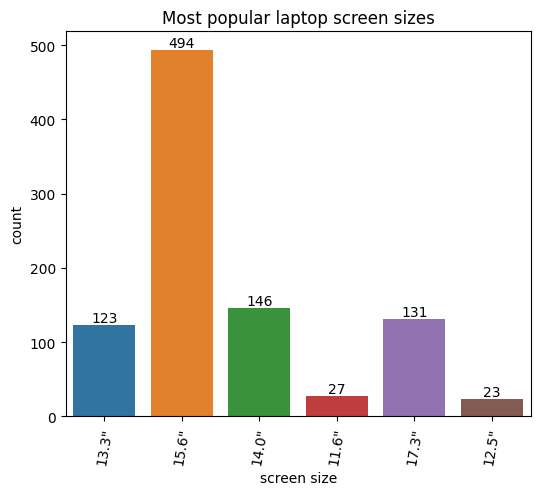

In [212]:
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.countplot (
    x='screen size',
    data= df_clean
)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Most popular laptop screen sizes')
plt.show()

In [213]:
print('We removed {} outliers!'.format(len(df_train)-len(df_clean)))


We removed 33 outliers!


In [214]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex = True, figsize = (10,5),gridspec_kw = {"height_ratios": (.2, .8)})
    ax[0].set_title(title)
    sns.boxplot(x = col, data = df, ax = ax[0])
    ax[0].set(yticks = [])
    sns.histplot(x = col, data = df, ax = ax[1])
    ax[1].set_xlabel(col)
    plt.axvline(df[col].mean(), color = 'darkgreen', label = 'mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color = 'red', label = 'median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color = 'purple', label = 'mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor = (1, 1.03), ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.tight_layout()
    plt.show()

### How is Weight distributed among laptops

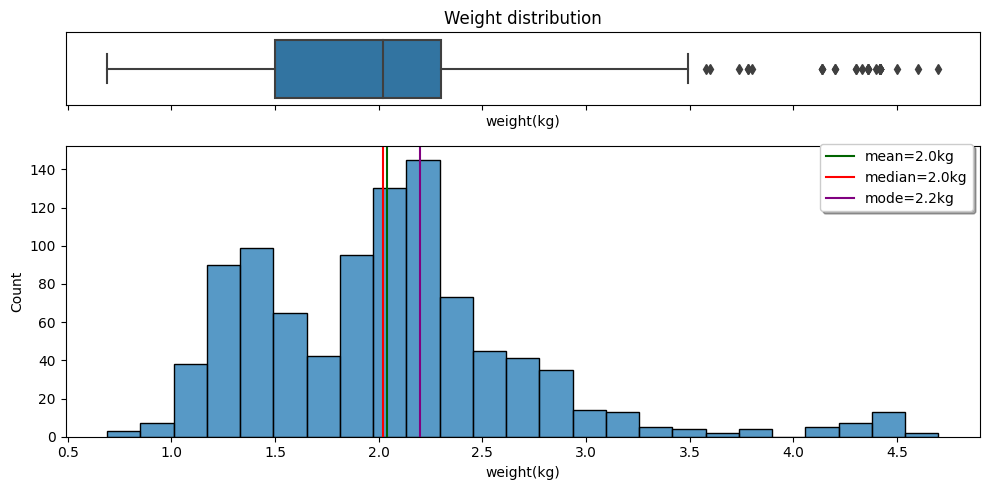

In [215]:
num_plot(df_train,'weight(kg)','Weight distribution', 'kg')

### How is price distributed among Laptops ?

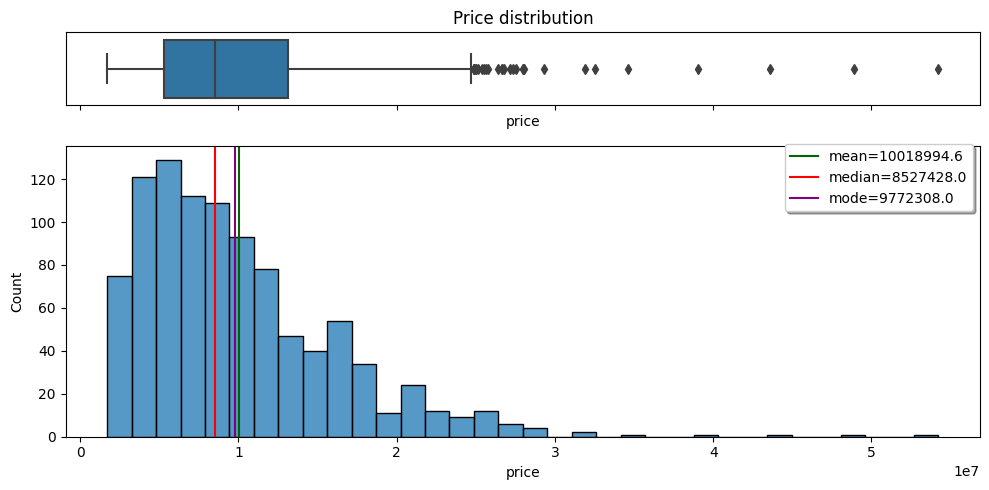

In [216]:
num_plot(df_train,'price','Price distribution', '')

<Axes: xlabel='price', ylabel='category'>

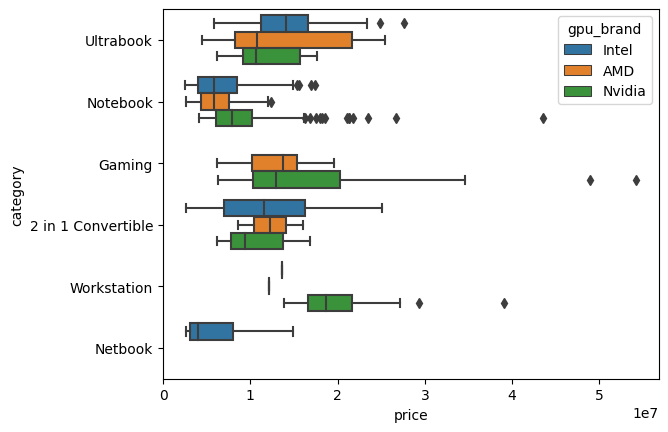

In [217]:
sns.boxplot (y = 'category',
            data=df_train[df_train.price>2500000],
            x='price',hue = 'gpu_brand')

### How is RAM distributed among the laptops?

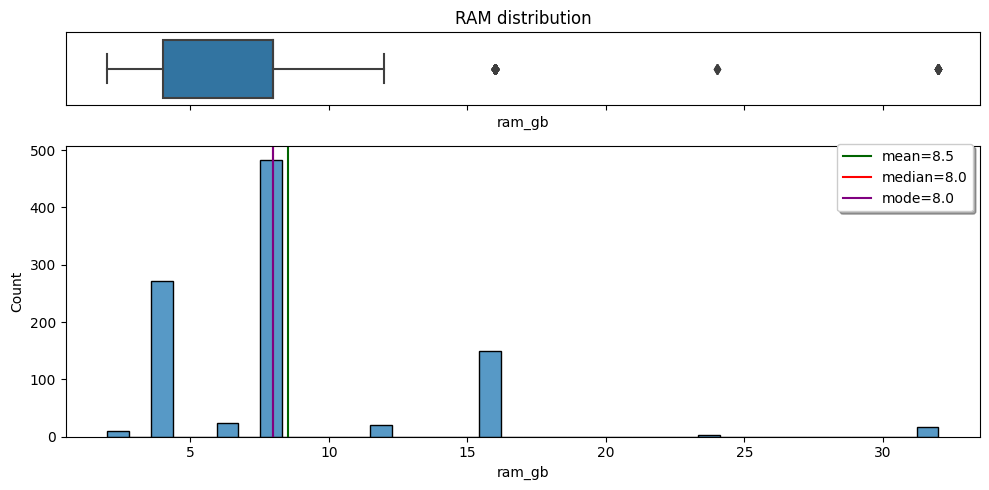

In [219]:
num_plot(df_train,'ram_gb','RAM distribution','')

How is Hard Drive capacity distributed among the laptops ?

First, we analyze the first hard drive storage capacity

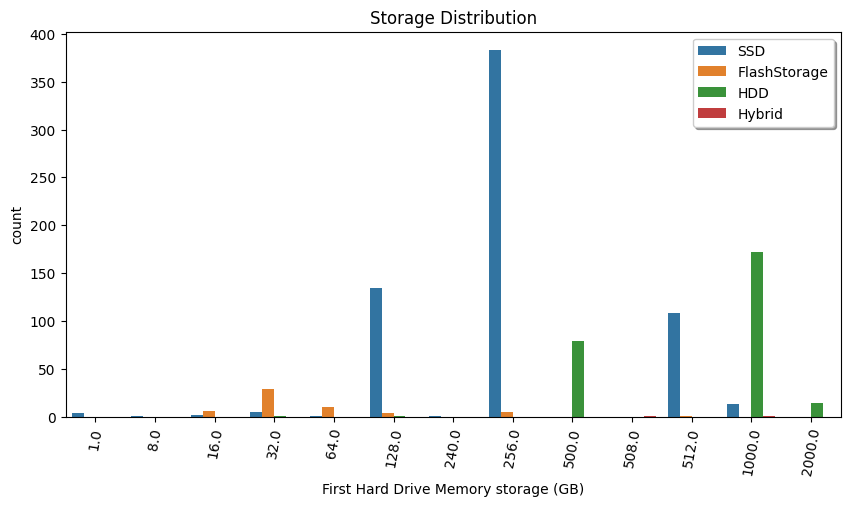

In [220]:
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x='storage_1_gb',
                   data=df_train,
                   hue = 'storage_1_type')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)
ax.set_xlabel('First Hard Drive Memory storage (GB)')
plt.legend(fancybox=True,shadow=True,frameon=True)
plt.title('Storage Distribution')
plt.show()

Most PCs use SSD, and with 256 GB storage.

HDD are used for 500 or 1000 GB and above

### Second Hard drive analysis

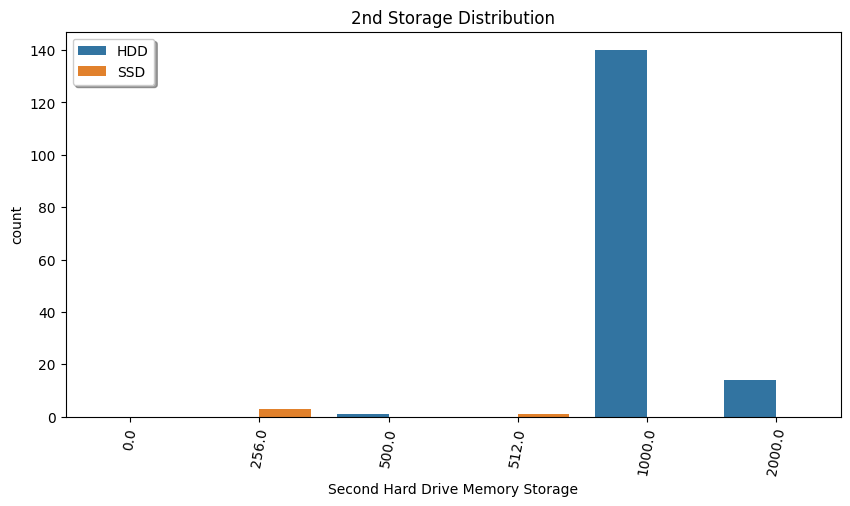

In [230]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(
    x='storage_2_gb',
    data=df_train,
    hue = 'storage_2_type'
)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)
ax.set_title('2nd Storage Distribution')
ax.set_xlabel('Second Hard Drive Memory Storage')
plt.legend(loc = 'upper left', ncol = 1, fancybox = True, shadow = True, frameon = True)
plt.show()

The majority of the second Hard Drive Memory Storage is 1TB HDD

## Multivariate outliers detection

### Price vs RAM

In [259]:
def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x = col_x, y = col_y, data = df, color='#0d98ba', line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept

In [241]:
from scipy import stats

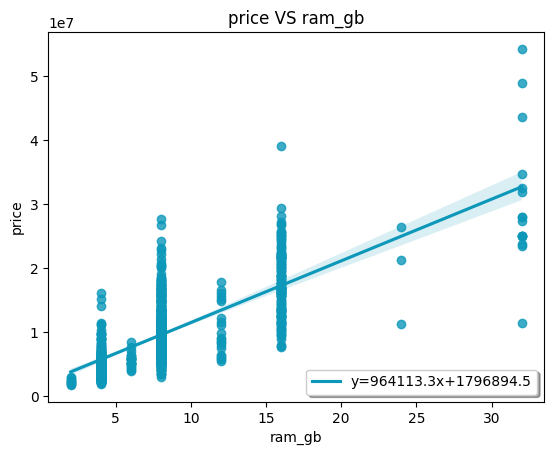

(964113.2672611707, 1796894.5164584704)

In [250]:
lr_plot(df_train,'ram_gb','price','lower right')

### Price vs Inches


In [254]:
df_clean['screen size']= df_clean['screen size'].str.replace('"','').astype(float)


In [255]:
df_test['screen size']= df_test['screen size'].str.replace('"','').astype(float)


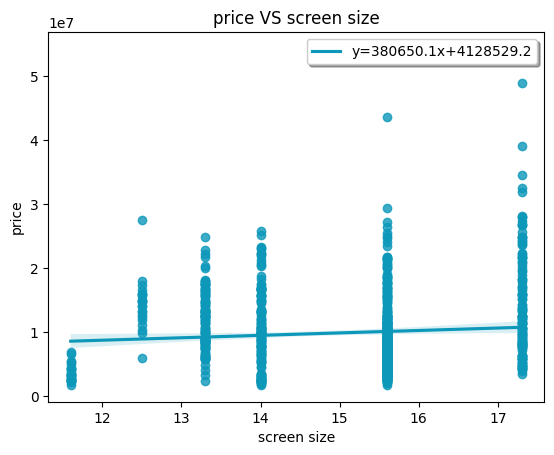

(380650.13720973703, 4128529.2023606533)

In [256]:
lr_plot(df_clean,'screen size','price','upper right')

## Weight Vs Inches

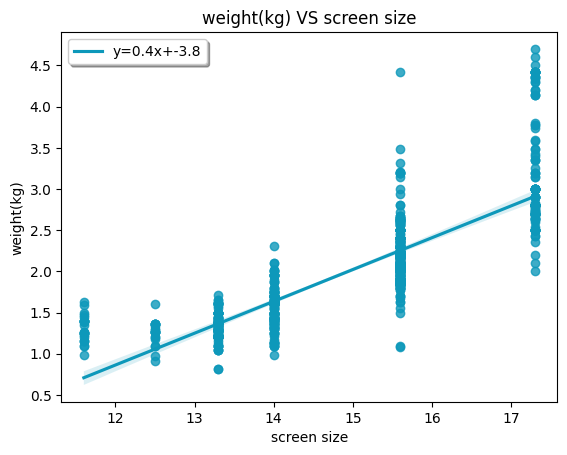

(0.3861439968825349, -3.770207871573977)

In [260]:
lr_plot(df_clean,'screen size','weight(kg)', 'upper left')

### Price vs CPU brand by GPU Brand

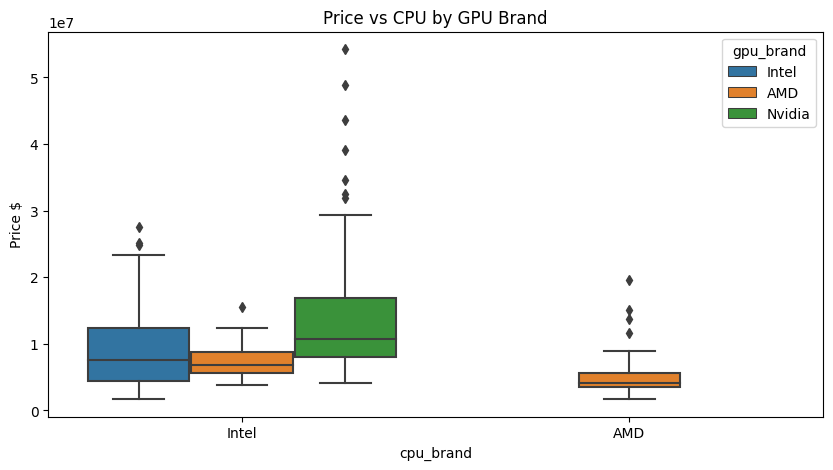

In [266]:
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.boxplot(
    x='cpu_brand',
    data = df_clean,
    y='price',
    hue='gpu_brand'
)

ax.set_title('Price vs CPU by GPU Brand')
plt.ylabel('Price $')
plt.show()

Observations:
- Intel computers with Nvidia GPU is the most expensive.
- AMD CPU always have AMD GPU.
- Intel CPUs are more expensive.
- Nvidia GPUs are more expensive.

### Which are top 15 most common GPUs ?

In [279]:
gpu_list = df_clean.gpu.value_counts()[:15].index.tolist()

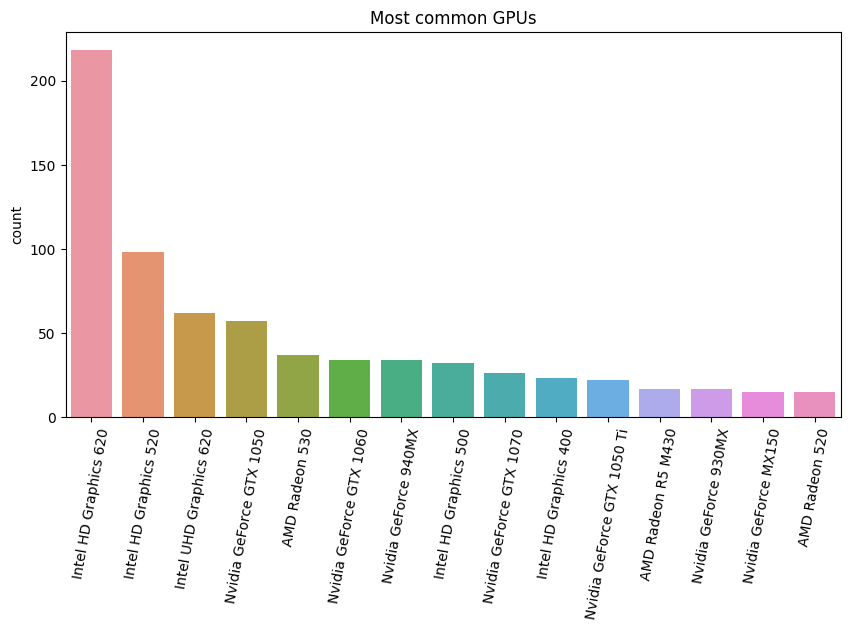

In [288]:
fig,ax = plt.subplots(figsize = (10,5))

ax= sns.countplot(
    x='gpu',
    data=df_clean.loc[df_clean.gpu.isin(gpu_list)],
    order = gpu_list
)
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
ax.set_title('Most common GPUs')
plt.xlabel('')
plt.show()

In [293]:
cpu_list = df_clean.cpu.value_counts().head(15).index.tolist()

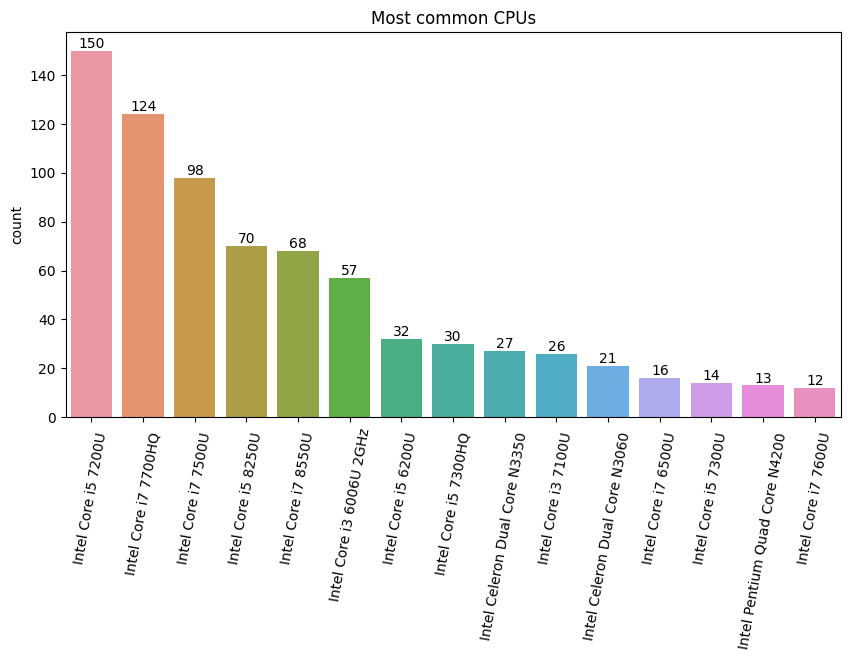

In [300]:
fig,ax = plt.subplots(figsize=(10,5))

ax=sns.countplot(
    x='cpu',
    data= df_clean[df_clean.cpu.isin(cpu_list)],
    order = cpu_list
)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)
ax.bar_label(ax.containers[0])
plt.xlabel('')
plt.title('Most common CPUs')
plt.show()

### **What is the average price of laptops by company?**

In [308]:
manu_list = df_clean.manufacturer.value_counts().index.tolist()[:8]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6000\3474609141.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax= sns.barplot(


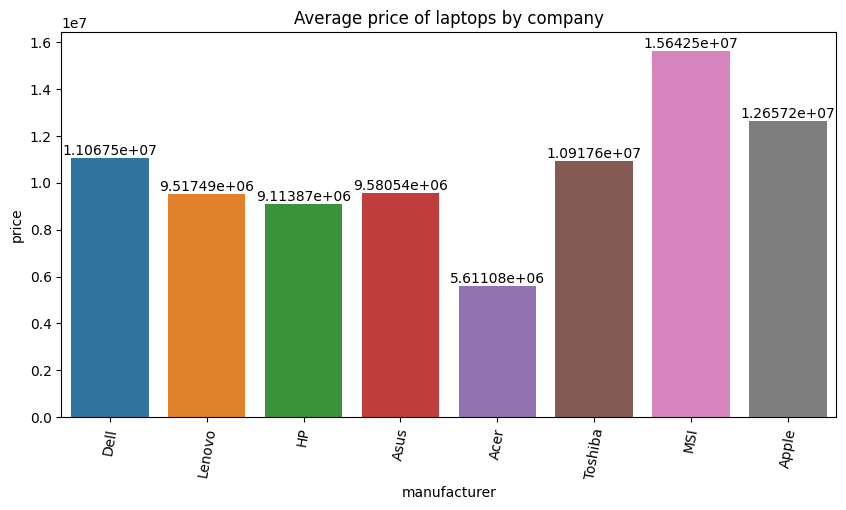

In [321]:
fig,ax = plt.subplots(figsize=(10,5))

ax= sns.barplot(
    x='manufacturer',
    y='price',
    data= df_clean.loc[df_clean.manufacturer.isin(manu_list)],
    order= manu_list,
    ci= False
)
plt.xticks(rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Average price of laptops by company')
plt.show()

- MSI laptops are the most expensive
- Apple laptops are second in price, while Acer are the cheapest.
- Dell, Lenovo, HP, and Asus are average in price.

### **Correlation Matrix**

In [325]:
df_clean.head()

,manufacturer,model name,category,screen size,cpu,ram_gb,gpu,operating system,operating system version,weight(kg),...,resolution,screen_type,touchscreen,cpu_frequency_ghz,storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8.0,Intel Iris Plus Graphics 640,macOS,NaN,1.37,...,2560x1600,IPSPanelRetinaDisplay,NaN,2.3,128.0,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8.0,Intel HD Graphics 6000,macOS,NaN,1.34,...,1440x900,NaN,NaN,1.8,128.0,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8.0,Intel HD Graphics 620,No OS,NaN,1.86,...,1920x1080,NaN,NaN,2.5,256.0,SSD,0.0,NaN,Intel,Intel
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8.0,Intel Iris Plus Graphics 650,macOS,NaN,1.37,...,2560x1600,IPSPanelRetinaDisplay,NaN,3.1,256.0,SSD,0.0,NaN,Intel,Intel
5,Acer,Aspire 3,Notebook,15.6,AMD A9-Series 9420 3GHz,4.0,AMD Radeon R5,Windows,10,2.10,...,1366x768,NaN,NaN,3.0,500.0,HDD,0.0,NaN,AMD,AMD


In [327]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 944 entries, 0 to 976
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              944 non-null    object 
 1   model name                944 non-null    object 
 2   category                  944 non-null    object 
 3   screen size               944 non-null    float64
 4   cpu                       944 non-null    object 
 5   ram_gb                    944 non-null    float64
 6   gpu                       944 non-null    object 
 7   operating system          944 non-null    object 
 8   operating system version  817 non-null    object 
 9   weight(kg)                944 non-null    float64
 10  price                     944 non-null    float64
 11  resolution                944 non-null    object 
 12  screen_type               262 non-null    object 
 13  touchscreen               123 non-null    object 
 14  cpu_frequency_g

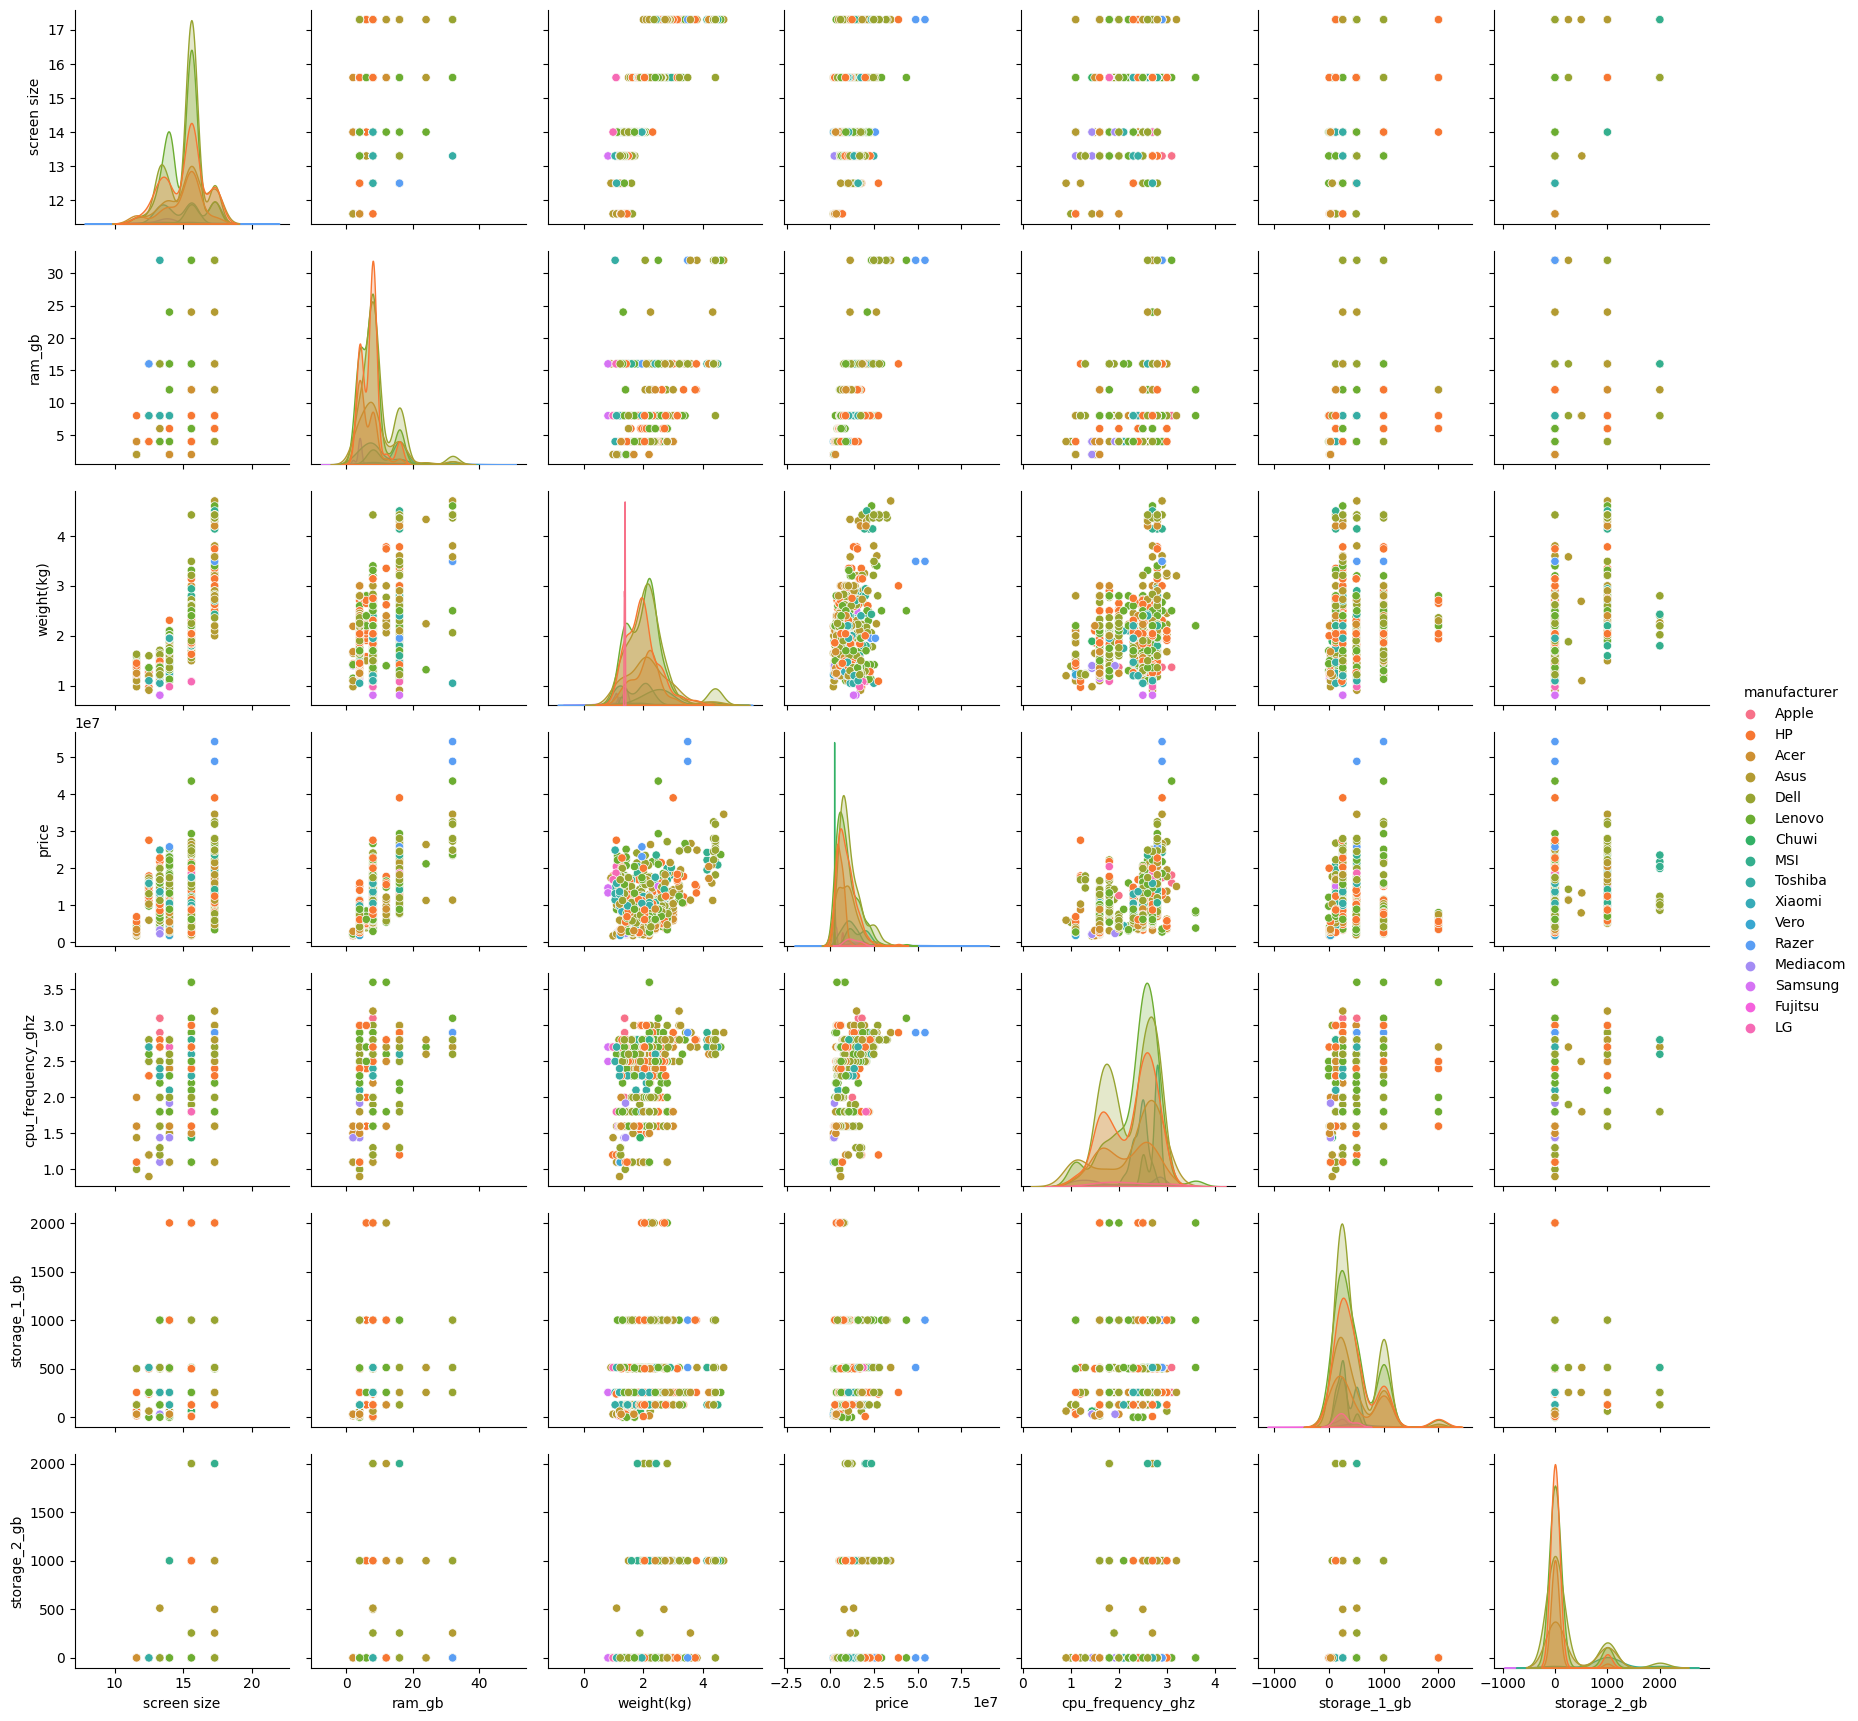

In [338]:
sns.pairplot(df_clean,vars=['screen size','ram_gb','weight(kg)','price','cpu_frequency_ghz','storage_1_gb','storage_2_gb'],
             hue = 'manufacturer')
plt.show()

In [340]:
df_corr = df_clean[['screen size','ram_gb','weight(kg)','price','cpu_frequency_ghz','storage_1_gb','storage_2_gb']].corr()

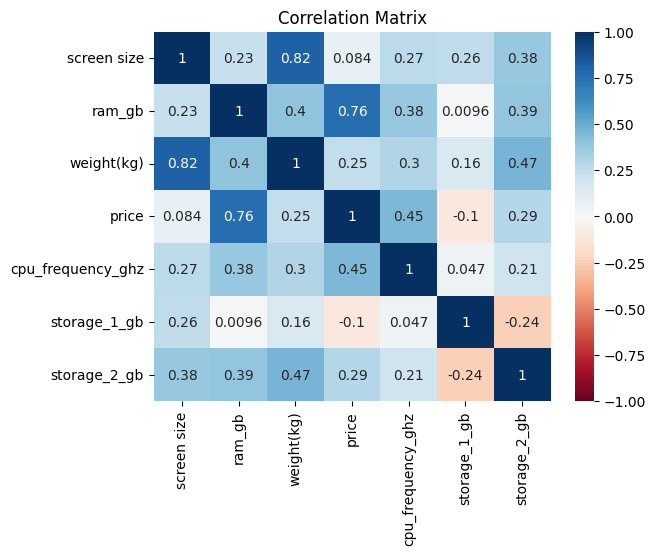

In [346]:
sns.heatmap(df_corr,cmap = 'RdBu', annot = True, vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()

- It seems that price has high positive correlations with RAM and moderate CPU Frequency.
- Another quite obvious point is that the bigger the screen size, the heavier the laptops (weight vs screen size)